# Assignment 4

Sonu Adhikari

# 1. Import Necessary Libraries

In [171]:
import pandas as pd
import numpy as np

In [172]:
df_resume = pd.read_csv('resume.csv')

In [173]:
df_resume.shape

(2484, 4)

In [174]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [175]:
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [176]:
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume = df_resume.copy().iloc[:1000, ]
df_resume.shape

(1000, 4)

## 2. Load Skills and Education Data

In [177]:
import spacy

nlp = spacy.load('en_core_web_md')
skill_path = "education_skills.jsonl"

In [178]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [179]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [180]:
doc = nlp("Sonu is a master student")
doc.ents

(Sonu, master)

## 3. Extracting skills and education from resume.csv

In [181]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
1225,13837784,DIGITAL MEDIA BUYER Professio...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
580,19557384,BUSINESS DEVELOPMENT LEADER Su...,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT
739,15636923,CERTIFIED PERSONAL TRAINER ...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE
1555,74512244,FINANCE OFFICE ASSOCIATE Profes...,"<div class=""LCA skn-hrt2 fontsize fontface vma...",FINANCE
544,29177904,ADMINISTRATIVE ASSISTANT Summ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE


In [182]:
#cleaning our data
from spacy.lang.en.stop_words import STOP_WORDS

def preprocessing(sentence):
    
    stopwords = list(STOP_WORDS)
    doc = nlp(sentence)
    cleaned_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SPACE' and \
            token.pos_ != 'SYM':
                cleaned_tokens.append(token.lemma_.lower().strip())
                
    return " ".join(cleaned_tokens)

In [183]:
random_resume = df_resume.Resume_str.iloc[5]
random_resume

'         DIRECTOR OF BUSINESS DEVELOPMENT       Professional Summary     Extensive experience in LTAC Marketing in a hospital setting. Ability to build strong rapport with physicians, patient\'s families, case managers and health care community. Managed and lead team of clinical, admissions and marketing liaisons and efficiently communicated patients\' needs to clinical staff. Expert in planning and executing marketing strategies to build relationships in new territories and increased referral sources. Track record of consistent growth in census of hospital through demonstrating strong professional relationships with referral sources and turn potential referrals into admissions. Self driven and innovative with a strong desire to compete with other LTACHs to increase hospital census. High recommendations by leading physicians based on performance and work ethics.       Highlights          Excellent interpersonal communication skills with the ability to keep professionalism.  Confident 

In [184]:
#random sampling
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

"         DIRECTOR OF BUSINESS DEVELOPMENT       Professional Summary     Extensive experience in LTAC Marketing in a hospital setting. Ability to build strong rapport with physicians, patient's families, case managers and health care community. Managed and lead team of clinical, admissions and marke"

In [185]:
preprocessing(random_resume[:300])

'director of business development professional summary extensive experience ltac marketing hospital setting ability build strong rapport physician patient family case manager health care community managed lead team clinical admission marke'

In [186]:
#let's apply to the whole dataframe
for i, row in df_resume.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume.at[i, 'Clean_resume'] = clean_text

In [187]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
1225,13837784,DIGITAL MEDIA BUYER Professio...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital media buyer professional summary versa...
580,19557384,BUSINESS DEVELOPMENT LEADER Su...,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT,business development leader summary business d...
739,15636923,CERTIFIED PERSONAL TRAINER ...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE,certified personal trainer professional summar...
1555,74512244,FINANCE OFFICE ASSOCIATE Profes...,"<div class=""LCA skn-hrt2 fontsize fontface vma...",FINANCE,finance office associate professional summary ...
544,29177904,ADMINISTRATIVE ASSISTANT Summ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE,administrative assistant summary masters prepa...


## 4. Extracting skills

In [188]:
def get_skills(text):
    #pass the text to the nlp
    doc = nlp(text)  #note that this nlp already know skills
    
    skills = []
    
    #look at the ents
    for ent in doc.ents:
        #if the ent.label_ is SKILL, then we append to some list
        if ent.label_ == "SKILL":
            skills.append(ent.text)
    
    return skills

def unique_skills(x):
    return list(set(x))

## 5 Extracting Education

In [189]:
def get_education(text):
    doc = nlp(text)
    education = []
    for ent in doc.ents:
        if ent.label_ == "EDUCATION":
            education.append(ent.text)
    return education

def unique_education(x):
    return list(set(x))

In [190]:
df_resume.head(1)

,ID,Resume_str,Resume_html,Category,Clean_resume
1225,13837784,DIGITAL MEDIA BUYER Professio...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,digital media buyer professional summary versa...


In [191]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

In [192]:
df_resume['Education'] = df_resume.Clean_resume.apply(get_education)
df_resume['Education'] = df_resume.Education.apply(unique_education)

In [193]:
df_resume.Skills.iloc[0]

['testing',
 'google',
 'medium',
 'marketing',
 'drupal',
 'wordpress',
 'business',
 'mobile',
 'search engine',
 'optimizely',
 'google analytics',
 'twitter']

In [213]:
df_resume.Education.iloc[1]

['masters', 'undergraduate']

## 5. Visualization

In [214]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [215]:
category = 'INFORMATION-TECHNOLOGY'
cond = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(46, 7)

In [197]:
all_skill = np.concatenate(df_resume_it.Skills.values)

In [198]:
#counting
from collections import Counter, OrderedDict

counting = Counter(all_skill)
counting = OrderedDict(counting.most_common(10))

In [199]:
counting

OrderedDict([('support', 40),
             ('software', 38),
             ('design', 35),
             ('business', 32),
             ('windows', 27),
             ('security', 27),
             ('project management', 25),
             ('server', 24),
             ('database', 20),
             ('documentation', 19)])

<BarContainer object of 10 artists>

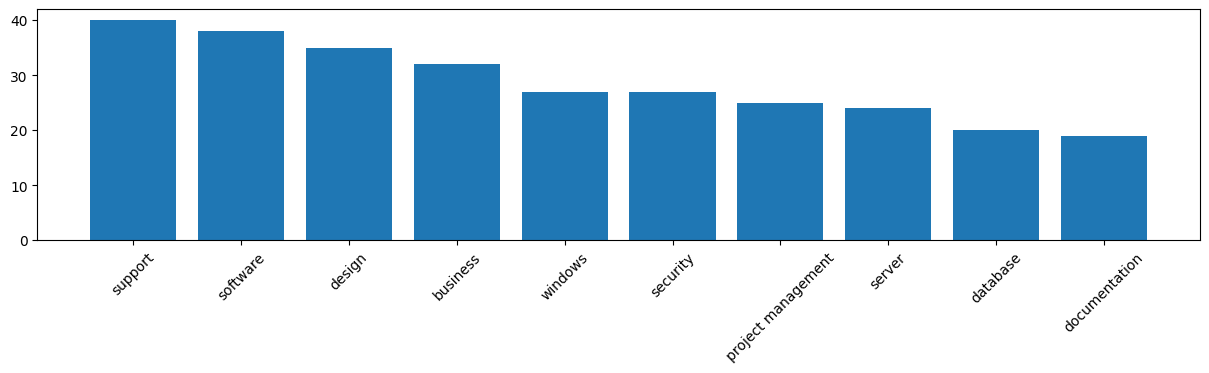

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.xticks(rotation =45)

plt.bar(counting.keys(), counting.values())

## 6. Name entity recognition

In [201]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[43]

In [202]:
doc = nlp(text)

In [203]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [204]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

In [216]:
colors = {"EDUCATION": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

## 7. Lets load the pdf - Add Some Realism

In [205]:
from PyPDF2 import PdfReader
#pip install PyPDF2
reader = PdfReader("someone_cv.pdf")
page = reader.pages[0] #first page just for demo
text = page.extract_text() 

In [206]:
text = preprocessing(text)

In [207]:
doc = nlp(text)

In [208]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

In [217]:
colors = {"EDUCATION": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

In [209]:
#last thing i go to assignment
#collect all the skill and put it into a list

skills = []

for ent in doc.ents:
    if ent.label_ == 'SKILL':
        skills.append(ent.text)
        
print(set(skills))

{'ai', 'engineering', 'deep learning', 'algorithms', 'computer science'}


In [218]:
education = []

for ent in doc.ents:
    if ent.label_ == 'EDUCATION':
        education.append(ent.text)
        
print(set(education))

set()


## Adding it on my own Resume

In [219]:
from PyPDF2 import PdfReader
#pip install PyPDF2

reader = PdfReader("sonu_adhikari_cv.pdf")
page = reader.pages[0] #first page just for demo
text = page.extract_text() 

In [220]:
text = preprocessing(text)

In [221]:
doc = nlp(text)

In [222]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

In [223]:
colors = {"EDUCATION": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)